In [ ]:
import pandas as pd

# Try loading the dataset with a different encoding, like 'latin-1'
df = pd.read_csv('/content/E-Commerce Data.csv', encoding='latin-1')

# Display the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Info about the dataset
print("Info about the dataset:")
df.info()


Shape of the dataset: (541909, 8)
Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Handling missing values
# For numerical columns, fill with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Verify no missing values remain
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Descriptive statistics
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.00000
mean,9.552250,4.611114,15287.69057
std,218.081158,96.759853,1484.74601
min,-80995.000000,-11062.060000,12346.00000
25%,1.000000,1.250000,14367.00000
50%,3.000000,2.080000,15287.69057
75%,10.000000,4.130000,16255.00000
max,80995.000000,38970.000000,18287.00000


In [ ]:
# Print column names to find the correct column names for Price and Quantity
print("Column names:", df.columns)

Column names: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


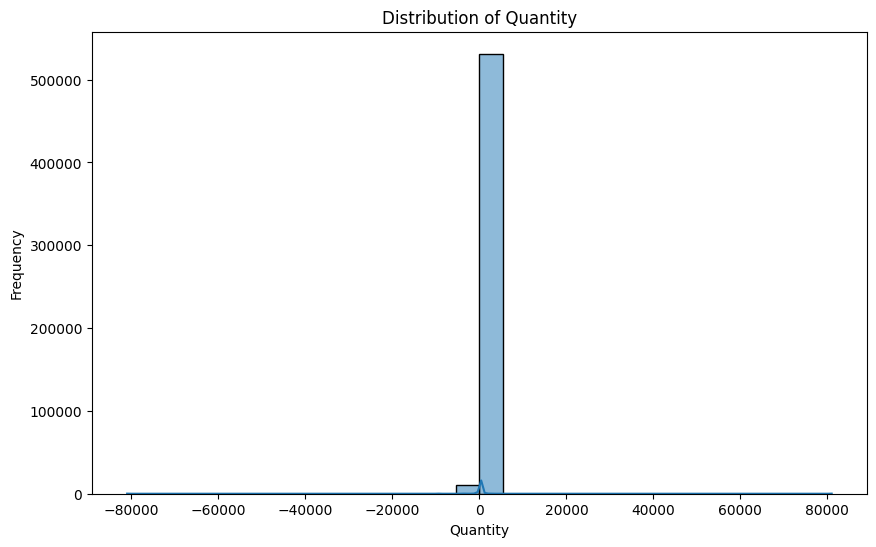

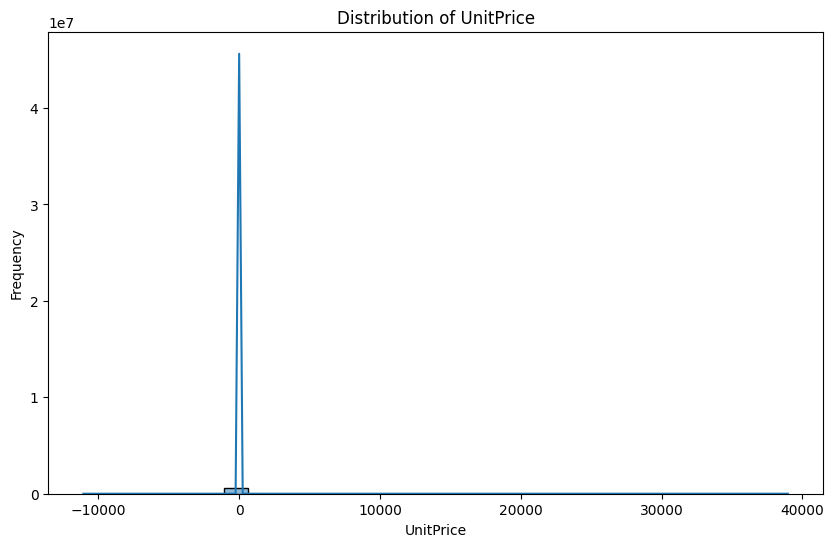

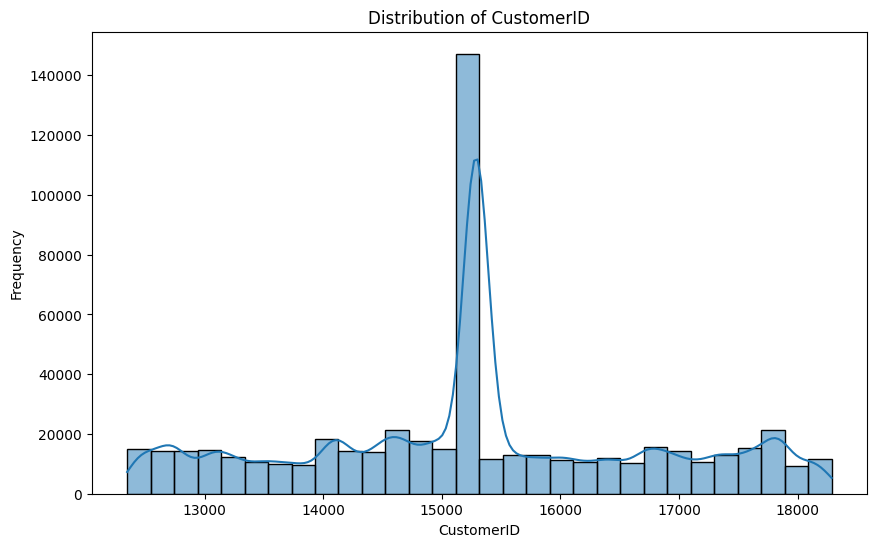

In [ ]:
# Plot histograms for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')


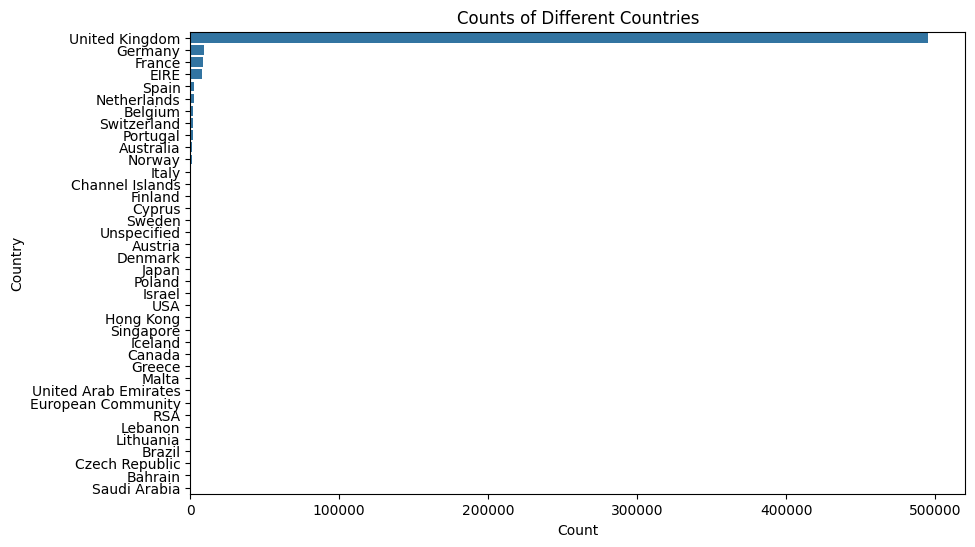

In [ ]:
# Bar plot for a categorical feature (example: 'Country')
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Counts of Different Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

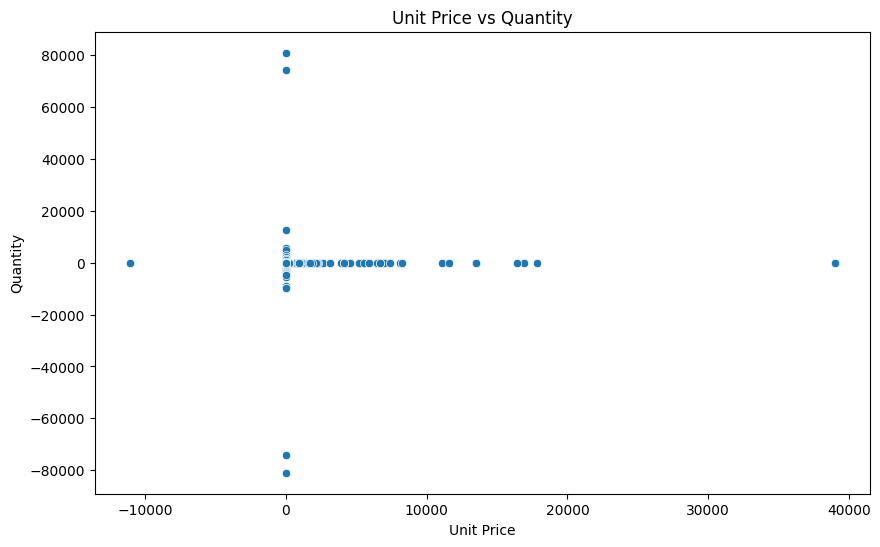

In [ ]:
# Scatter plot for 'UnitPrice' vs 'Quantity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

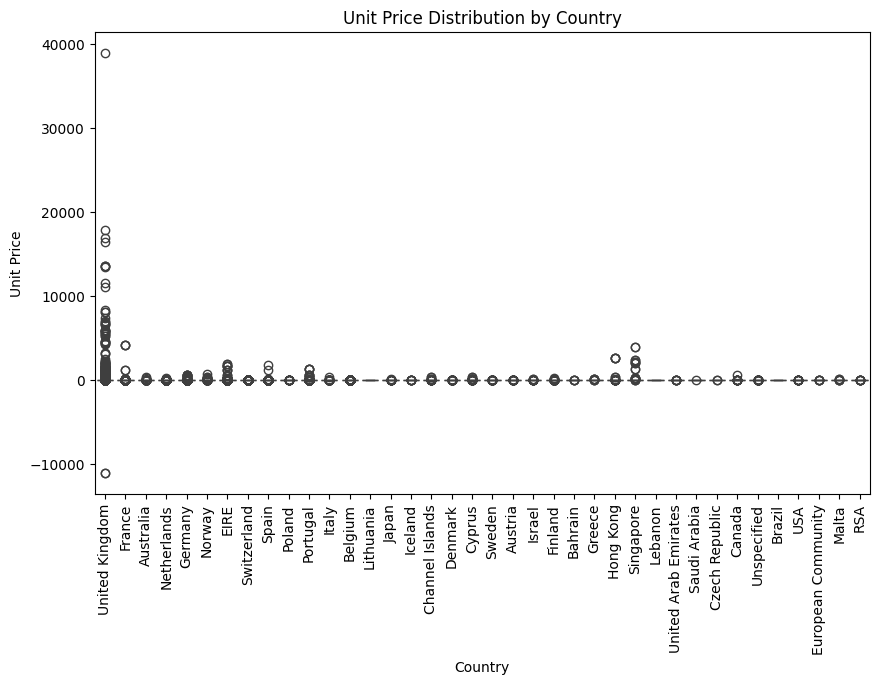

In [ ]:
# Box plot (example: 'UnitPrice' distribution by 'Country')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df)
plt.title('Unit Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Set 'InvoiceDate' as the index
df.set_index('InvoiceDate', inplace=True)

In [ ]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                    InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

                     Quantity  UnitPrice  CustomerID         Country  
InvoiceDate                                                           
2010-12-01 08:26:00         6       2.55     17850.0  United Kingdom  
2010-12-01 08:26:00         6       3.39     17850.0  United Kingdom  
2010-12-01 08:26:00         8       2.75     17850.0  United Kingdom  
2010-12-01 08:26:00         6       3.39     17850.0 

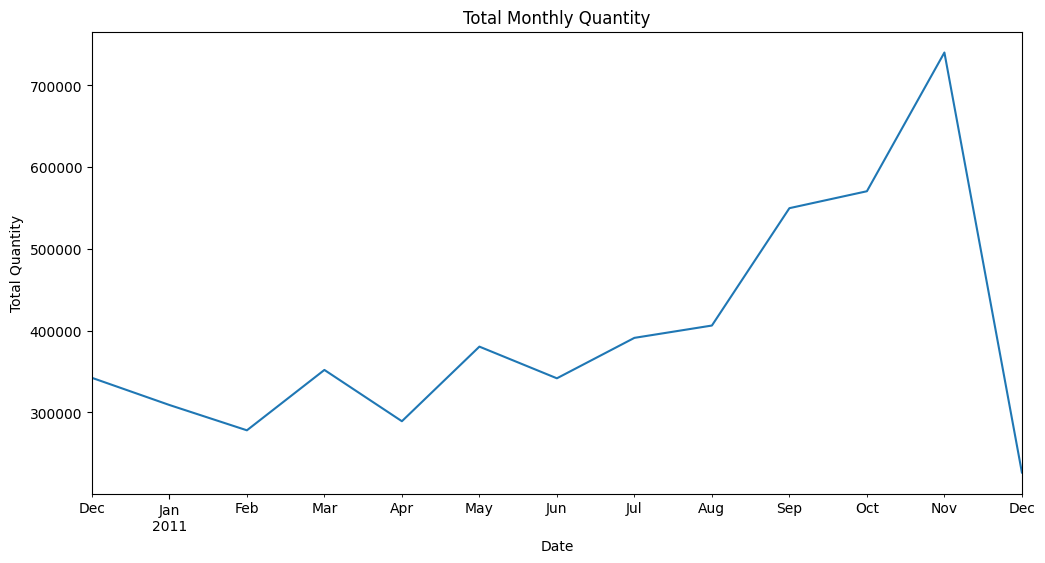

In [ ]:
# Line plot for a time series feature (example: total 'Quantity' over time)
plt.figure(figsize=(12, 6))
df['Quantity'].resample('M').sum().plot()
plt.title('Total Monthly Quantity')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

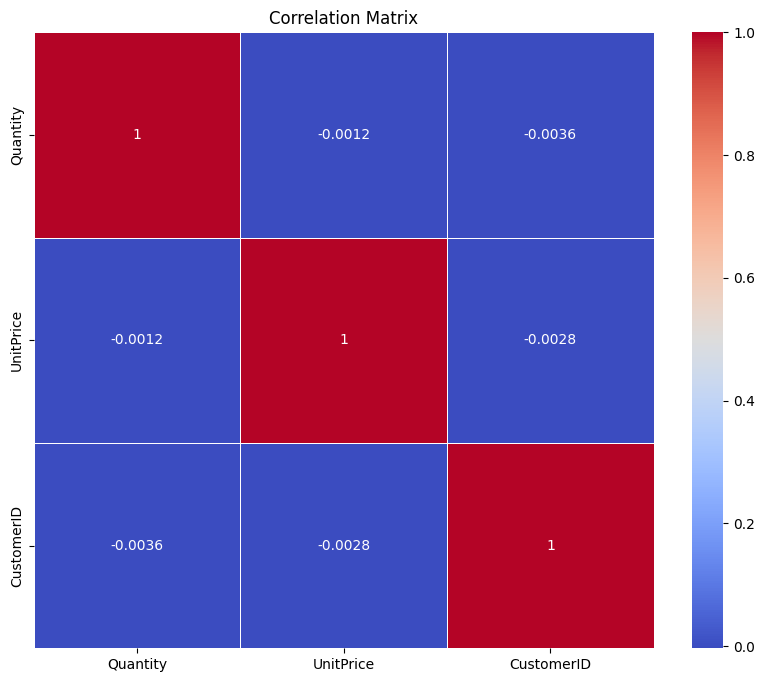

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
import pandas as pd

# Load data from a CSV file
# Replace 'your_data.csv' with the actual file path if it's in a different directory
file_path = 'path/to/your_data.csv'  # Update with the correct path
df = pd.read_csv(file_path)

# Repeat Customers
repeat_customers = df.groupby('CustomerID').size().reset_index(name='Counts')
repeat_customers = repeat_customers[repeat_customers['Counts'] > 1]
total_customers = df['CustomerID'].nunique()
repeat_customers_percentage = (len(repeat_customers) / total_customers) * 100
print(f"Repeat Customers: {repeat_customers_percentage:.2f}% of total customers")

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your_data.csv'